In [23]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [55]:
def landscape(roughness):
    """
    The landscape function creates a two dimensional fractal matrix of 1 and -1
    """
    levels = 11
    size = 2 ** (levels - 1)
    height  = np.zeros((size + 1, size + 1))

    for lev in range(levels):
        step = size // 2 ** lev
        for y in range(0, size + 1, step):
            jumpover = 1 - (y // step) % 2 if lev > 0 else 0
            for x in range(step * jumpover, size + 1, step * (1 + jumpover)):
                pointer = 1 - (x // step) % 2 + 2 * jumpover if lev > 0 else 3
                yref, xref = step * (1 - pointer // 2), step * (1 - pointer % 2)
                corner1 = height[y - yref, x - xref]
                corner2 = height[y + yref, x + xref]
                average = (corner1 + corner2) / 2.0
                variation = (math.pow( step,roughness)) * (random.random() - 0.5)
                height[y,x] = average + variation if lev > 0 else 0
                
    n_max = height.max()
    n_min = height.min()
    for x in range(0,size+1):
        for y in range(0,size+1):
            height[x,y]=(height[x,y]-n_min)/(n_max-n_min)
    return size,height

1024 0.0 1.0


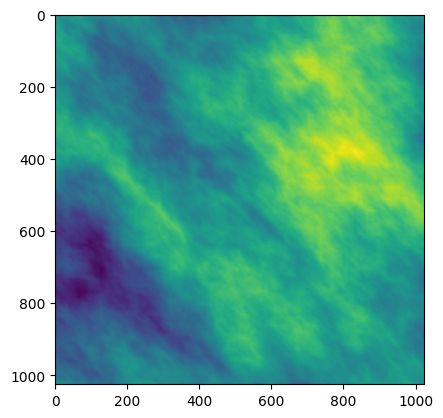

In [59]:
s,v = landscape(0.8)
print(s,v.min(),v.max())
plt.imshow(v)

In [33]:
print(n.min(),n.max())

-0.006878017507174432 0.00624164178987062
